#### Part iii - Feature Engineering
Create new features that may be useful for running the model:
- Date, day of week, time
- Categorise wins (Home/Draw/Loss)
- Home/Away/Total win streak
- Home/Away/Total form (last 5 matches)
- Goals scored that season (as per game ratio)

Note some data will need to be normalised (i.e. divided as per game ratio) to account for inconsistent/incomplete dataset.

In [1]:
import pandas as pd
import os
import datetime as dt
import numpy as np
from IPython.display import display
import dtale
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):

In [2]:
project_dir = os.path.dirname(os.path.abspath(''))
df = pd.read_json(os.path.join(project_dir, 'cleaned_dataset.json'))
df.head()

,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch,Elo_home,Elo_away
0,Perugia,Bologna,2-1,https://www.besoccer.com/match/perugia/bologna...,2015,1,serie_b,"Friday, 29 August 2014, 20:30",Referee: Claudio Gavillucci,4,0,4,2,Perugia,Italy,Stadio Renato Curi,28000,Natural,46,67
1,Avellino,Pro Vercelli,1-0,https://www.besoccer.com/match/us-avellino/us-...,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Ivano Pezzuto,2,0,4,1,Avellino,Italy,Stadio Partenio,10215,Natural,56,54
2,Catania,Virtus Lanciano,3-3,https://www.besoccer.com/match/catania/ss-virt...,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Daniele Minelli,6,1,3,1,Catania,Italy,Stadio Angelo Massimino,23420,Natural,67,48
3,Crotone,Ternana Calcio,0-2,https://www.besoccer.com/match/fc-crotone/tern...,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Maurizio Mariani,5,0,4,0,Crotone,Italy,Ezio Scida,16640,Natural,60,53
4,Virtus Entella,SSC Bari,0-2,https://www.besoccer.com/match/virtus-entella/...,2015,1,serie_b,"Saturday, 30 August 2014, 20:30",Referee: Leonardo Baracani,2,0,2,0,Chiavari,Italy,Stadio Comunale Chiavari,4154,Artificial,40,60


Convert non numerical data that will be used in the model, to numerical data.

In [3]:
df['Capacity'] = df['Capacity'].str.replace(',', '')
df['Capacity'] = df['Capacity'].astype('int64')

Create date and time features.

In [4]:
df['Date'] = df['Date_New'].apply(lambda x: x[x.find(',') + 2:x.rfind(',')])
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
#print(set(df['Date']))

df['Day'] = df['Date_New'].apply(lambda x: (x[:x.find(',')]))
df['Day'] = df['Date'].dt.day_of_week
print(set(df['Day']))

df['Time'] = df['Date_New'].apply(lambda x: x[x.rfind(',') + 2:])
print(set(df['Time']))
df.head()

df = df.drop(['Date_New'], axis=1)

{0, 1, 2, 3, 4, 5, 6}
{'17:05', '19:00', '16:15', '21:55', '14:05', '16:45', '19:15', '17:30', '17:40', '22:45', '19:30', '14:55', '22:15', '14:10', '20:00', '18:30', '23:00', '16:07', '16:35', '16:00', '20:20', '18:40', '21:10', '13:10', '13:15', '19:10', '13:45', '21:45', '19:25', '21:05', '18:00', '21:15', '18:35', '15:40', '11:30', '13:30', '19:05', '17:50', '01:00', '12:30', '17:00', '15:10', '14:45', '22:05', '17:25', '15:45', '21:00', '16:30', '14:35', '20:40', '14:15', '19:45', '21:30', '16:05', '15:30', '15:20', '17:10', '20:15', '12:00', '00:00', '18:55', '14:30', '14:37', '15:00', '23:15', '12:45', '18:10', '18:20', '22:00', '15:05', '18:50', '18:45', '15:15', '22:30', '19:55', '12:15', '23:30', '19:50', '18:25', '20:30', '21:35', '20:50', '17:15', '00:05', '20:45', '13:50', '16:10', '17:45', '17:07', '14:00', '20:55', '21:03', '13:05', '19:39', '20:35', '13:00', '21:08', '14:50', '05:35', '18:15'}


Put dataframe in chronological order and re-index.

In [5]:
df = df.sort_values(by='Date').reset_index(drop=True)
df

,Home_Team,Away_Team,Result,Link,Season,Round,League,Referee,Home_Yellow,Home_Red,...,City,Country,Stadium,Capacity,Pitch,Elo_home,Elo_away,Date,Day,Time
0,Olympique Lyonnais,Olympique,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1,Referee: Michel Vautrot,2,0,...,Lyon,France,Parc Olympique Lyonnais,59168,Natural,72,81,1989-07-21,4,00:00
1,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1,Referee: GÃ©rard Biguet,1,0,...,Toulouse,France,Stadium Municipal,35472,Natural,77,71,1989-07-22,5,00:00
2,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1,Referee: Alain Delmer,1,0,...,Montpellier,France,Stade de la Mosson,32950,Natural,74,73,1989-07-22,5,00:00
3,Sporting Toulon,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1,Referee: Jean-Claude Hirtz,2,0,...,Toulon,France,Stade de Bon-Rencontre,8000,None,76,76,1989-07-22,5,00:00
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1,Referee: JoÃ«l Quiniou,1,0,...,Nantes,France,Stade de la Beaujoire - Louis Fonteneau,38285,Natural,79,79,1989-07-22,5,00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105459,Chelsea,Man. Utd,0-0,https://www.besoccer.com/match/chelsea-fc/manc...,2021,26,premier_league,Referee: Attwell S.,1,0,...,Londres,England,Stamford Bridge,41841,Natural,90,91,2021-02-28,6,17:30
105460,Tottenham Hotspur,Burnley,4-0,https://www.besoccer.com/match/tottenham-hotsp...,2021,26,premier_league,Referee: Friend K.,0,0,...,Londres,England,Tottenham Hotspur Stadium,62062,Natural,89,73,2021-02-28,6,15:00
105461,Leicester,Arsenal,1-3,https://www.besoccer.com/match/leicester-city-...,2021,26,premier_league,Referee: Tierney P.,2,0,...,Leicester,England,King Power Stadium,32500,Natural,84,89,2021-02-28,6,13:00
105462,Nîmes,Nantes,1-1,https://www.besoccer.com/match/nimes-olympique...,2021,27,ligue_1,Referee: Batta F.,2,1,...,Nimes,France,Stade des Costières,18482,Natural,60,72,2021-02-28,6,15:00


Create a result column where +ve goals equate to home wins, -ve to away wins and 0 to draws.

In [6]:
def get_result(result):
    result_list = result.split('-')
    home = int(result_list[0])
    away = int(result_list[1])
    outcome = np.sign(home - away)
    return home, away, outcome

df[['Home_Goals', 'Away_Goals', 'Outcome']] = df.apply(lambda df: get_result(df['Result']), axis=1, result_type='expand')
df.head()

,Home_Team,Away_Team,Result,Link,Season,Round,League,Referee,Home_Yellow,Home_Red,...,Capacity,Pitch,Elo_home,Elo_away,Date,Day,Time,Home_Goals,Away_Goals,Outcome
0,Olympique Lyonnais,Olympique,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1,Referee: Michel Vautrot,2,0,...,59168,Natural,72,81,1989-07-21,4,00:00,1,4,-1
1,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1,Referee: GÃ©rard Biguet,1,0,...,35472,Natural,77,71,1989-07-22,5,00:00,3,0,1
2,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1,Referee: Alain Delmer,1,0,...,32950,Natural,74,73,1989-07-22,5,00:00,4,1,1
3,Sporting Toulon,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1,Referee: Jean-Claude Hirtz,2,0,...,8000,None,76,76,1989-07-22,5,00:00,2,0,1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1,Referee: JoÃ«l Quiniou,1,0,...,38285,Natural,79,79,1989-07-22,5,00:00,2,1,1


A separate binary feature is also create which covers home wins (i.e. 1 for a home win, 0 for not). This is because the outcome is so skewed towards home wins and to support binary classification models.

<AxesSubplot:>

2022-03-30 19:25:15,903 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


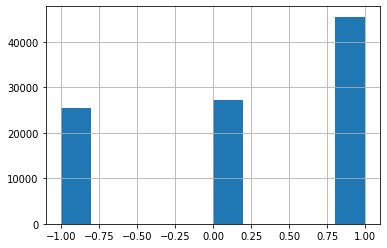

In [15]:
%matplotlib inline
df['Outcome'].hist()

<AxesSubplot:>

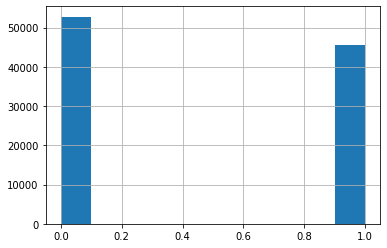

In [16]:
df['Outcome_Bin_H'] = df['Outcome'].mask(df['Outcome'] == -1, 0)
df['Outcome_Bin_H'].hist()

Remove unneeded columns. Cards are dropped because this information won't be known in advance of the match.

In [9]:
df = df.drop(['Link', 'Round', 'Referee', 'City', 'Stadium', 'Pitch', 'Time', 'Home_Yellow', 'Home_Red', 'Away_Yellow', 'Away_Red'], axis=1)

Calculate the following:
- Winning streak for home, away and both
- Form (i.e. sum of outcomes for last 5 matches) for home, away and both
- Goals scored over last 20 matches for home, away and both
All of these are shifted up one row to ensure the feature represents the team going into the match.

In [10]:
def get_streak(df, team):
    team_result_series = df['Outcome'].where(df['Home_Team'] == team, -df['Outcome'])
    team_streak_series = team_result_series.groupby((team_result_series != team_result_series.shift()).cumsum()).cumsum()
    return team_streak_series.where(team_streak_series > 0, 0)

def get_form(df, team):
    period = 5
    team_result_series = df['Outcome'].where(df['Home_Team'] == team, -df['Outcome'])
    return team_result_series.rolling(period).sum()

def get_goals(df, team, home, away):
    period = 10
    home_goal_series = df['Home_Goals'].where(df['Home_Team'] == team, 0).rolling(period).sum() / period
    away_goal_series = df['Away_Goals'].where(df['Away_Team'] == team, 0).rolling(period).sum() / period
    return home * home_goal_series + away * away_goal_series

for team in set(df['Home_Team'].to_list()):
    f_mask = (df['Home_Team'] == team) | (df['Away_Team'] == team)
    h_mask = (df['Home_Team'] == team)
    a_mask = (df['Away_Team'] == team)

    df.loc[f_mask, 'temp'] = get_streak(df[f_mask], team).shift()
    df.loc[h_mask, 'Home_Team_Streak'] = df.loc[h_mask, 'temp']
    df.loc[a_mask, 'Away_Team_Streak'] = df.loc[a_mask, 'temp']

    df.loc[h_mask, 'Home_Team_Home_Streak'] = get_streak(df[h_mask], team).shift()
    df.loc[a_mask, 'Away_Team_Away_Streak'] = get_streak(df[a_mask], team).shift()
    
    df.loc[f_mask, 'temp'] = get_form(df[f_mask], team).shift()
    df.loc[h_mask, 'Home_Team_Form'] = df.loc[h_mask, 'temp']
    df.loc[a_mask, 'Away_Team_Form'] = df.loc[a_mask, 'temp']

    df.loc[h_mask, 'Home_Team_Home_Form'] = get_form(df[h_mask], team).shift()
    df.loc[a_mask, 'Away_Team_Away_Form'] = get_form(df[a_mask], team).shift()

    df.loc[f_mask, 'temp'] = get_goals(df[f_mask], team, home=1, away=1).shift()
    df.loc[h_mask, 'Home_Team_Goals'] = df.loc[h_mask, 'temp']
    df.loc[a_mask, 'Away_Team_Goals'] = df.loc[a_mask, 'temp']

    df.loc[h_mask, 'Home_Team_Home_Goals'] = get_goals(df[h_mask], team, home=1, away=0).shift()
    df.loc[a_mask, 'Away_Team_Away_Goals'] = get_goals(df[a_mask], team, home=0, away=1).shift()
df = df.drop(['temp'], axis=1)
df = df.dropna(axis=0, subset=[
    'Home_Team_Streak',
    'Away_Team_Streak',
    'Home_Team_Home_Streak',
    'Away_Team_Away_Streak',
    'Home_Team_Form',
    'Away_Team_Form',
    'Home_Team_Home_Form',
    'Away_Team_Away_Form',
    'Home_Team_Goals',
    'Away_Team_Goals',
    'Home_Team_Home_Goals',
    'Away_Team_Away_Goals'])
dtale.show(df).open_browser()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98247 entries, 819 to 105463
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Home_Team              98247 non-null  object        
 1   Away_Team              98247 non-null  object        
 2   Result                 98247 non-null  object        
 3   Season                 98247 non-null  int64         
 4   League                 98247 non-null  object        
 5   Country                98247 non-null  object        
 6   Capacity               98247 non-null  int64         
 7   Elo_home               98247 non-null  int64         
 8   Elo_away               98247 non-null  int64         
 9   Date                   98247 non-null  datetime64[ns]
 10  Day                    98247 non-null  int64         
 11  Home_Goals             98247 non-null  int64         
 12  Away_Goals             98247 non-null  int64         
 13

View statistics for each feature.

In [11]:
df.describe()

,Season,Capacity,Elo_home,Elo_away,Day,Home_Goals,Away_Goals,Outcome,Outcome_Bin_H,Home_Team_Streak,...,Home_Team_Home_Streak,Away_Team_Away_Streak,Home_Team_Form,Away_Team_Form,Home_Team_Home_Form,Away_Team_Away_Form,Home_Team_Goals,Away_Team_Goals,Home_Team_Home_Goals,Away_Team_Away_Goals
count,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,...,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000,98247.000000
mean,2007.349761,32005.249779,69.983206,70.010820,4.685476,1.516077,1.088563,0.203314,0.463108,0.531233,...,1.022586,0.396521,-0.087728,0.128696,1.045966,-0.999155,1.294968,1.316256,1.523407,1.089391
std,8.672478,19381.473400,12.730966,12.732382,1.577752,1.273303,1.097233,0.825574,0.498640,1.138514,...,1.768239,0.864915,2.088423,2.083631,2.072639,2.092420,0.487752,0.491418,0.535701,0.443085
min,1990.000000,500.000000,35.000000,35.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.000000,0.100000,0.100000,0.000000
25%,2000.000000,18000.000000,60.000000,60.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,-2.000000,-1.000000,0.000000,-3.000000,1.000000,1.000000,1.100000,0.800000
50%,2008.000000,28016.000000,71.000000,71.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.200000,1.300000,1.500000,1.000000
75%,2015.000000,42000.000000,80.000000,80.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.600000,1.600000,1.800000,1.300000
max,2021.000000,99787.000000,100.000000,100.000000,6.000000,10.000000,13.000000,1.000000,1.000000,19.000000,...,33.000000,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,4.800000,3.800000


Drop non numerical columns.

In [12]:
df = df.drop(['Home_Team', 'Away_Team', 'Result', 'League', 'Country', 'Home_Goals', 'Away_Goals'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98247 entries, 819 to 105463
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Season                 98247 non-null  int64         
 1   Capacity               98247 non-null  int64         
 2   Elo_home               98247 non-null  int64         
 3   Elo_away               98247 non-null  int64         
 4   Date                   98247 non-null  datetime64[ns]
 5   Day                    98247 non-null  int64         
 6   Outcome                98247 non-null  int64         
 7   Outcome_Bin_H          98247 non-null  int64         
 8   Home_Team_Streak       98247 non-null  float64       
 9   Away_Team_Streak       98247 non-null  float64       
 10  Home_Team_Home_Streak  98247 non-null  float64       
 11  Away_Team_Away_Streak  98247 non-null  float64       
 12  Home_Team_Form         98247 non-null  float64       
 13

Add in new feature to penalise older date based on age of match and it's relevance to football today (i.e. number of days from todays date).

In [13]:
df['Match_Relevance'] = (pd.to_datetime('today').normalize() - df['Date']).dt.days
df['Match_Relevance'] = 1 / (df['Match_Relevance'] ** 2)
df = df.drop(['Date'], axis=1)

Export dataset

In [14]:
df.to_json(os.path.join(project_dir, 'model_prepped_dataset.json'))